In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import exp
import regression as r
import numpy as np

In [2]:
df = exp.get_wp_energy_data_8_day()
df["p-pet"] = df["precip"] - df["PET"]
df["p-et"] = df["precip"] - df["wp_le"] * .408
df.head()

,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,wp_RNET,...,wp_evi,wp_lswi2,wp_ndvi,wp_LST.day,wp_LST.night,LW_IN.wp,LW_IN.si,LW_IN,p-pet,p-et
0,7.33,0.808731,19.179167,195,0.0,22.320833,30.3156,4.958333,2012,20.798342,...,0.396594,0.353988,0.641934,31.567899,17.204530,29.105844,24.562860,29.105844,-7.33,-5.566712
1,6.52,0.755945,19.325000,196,0.0,21.770833,29.6316,3.791667,2012,20.573593,...,0.407211,0.376832,0.654545,29.570000,17.390000,29.760736,26.096551,29.760736,-6.52,-5.507494
2,6.92,0.858993,20.262500,197,0.0,21.908333,29.3472,4.137500,2012,20.475931,...,0.416158,0.394189,0.664269,31.097908,17.235624,30.299442,25.986418,30.299442,-6.92,-6.115032
3,6.35,0.477617,16.791667,198,0.0,22.420833,28.8180,6.033333,2012,20.571045,...,0.425106,0.411547,0.673993,30.868718,17.248525,28.978868,25.122209,28.978868,-6.35,-4.633187
4,5.13,0.556820,17.016667,199,0.0,21.529167,23.1732,4.350000,2012,16.757401,...,0.434053,0.428904,0.683716,30.657792,17.259663,30.653667,27.830367,30.653667,-5.13,-4.464786


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 30 columns):
PET             1030 non-null float64
VPD             1030 non-null float64
air_temp        1030 non-null float64
doy             1030 non-null int64
precip          1030 non-null float64
soil_temp       1030 non-null float64
sw_in           1030 non-null float64
wind_speed      1030 non-null float64
year            1030 non-null int64
wp_RNET         1030 non-null float64
wp_ch4_gf       1030 non-null float64
wp_co2_gf       1030 non-null float64
wp_er           1030 non-null float64
wp_gpp          1030 non-null float64
wp_h            1030 non-null float64
wp_le           1030 non-null float64
wp_bnd1         1030 non-null float64
wp_bnd2         1030 non-null float64
wp_bnd3         1030 non-null float64
wp_bnd7         1030 non-null float64
wp_evi          1030 non-null float64
wp_lswi2        1030 non-null float64
wp_ndvi         1030 non-null float64
wp_LST.day      1030 no

In [4]:
train_cols = ["precip", "sw_in", "LW_IN.wp", "VPD", "air_temp", "PET", "wind_speed", "wp_LST.day",
             "wp_LST.night", "wp_evi", "wp_ndvi", "wp_lswi2", "wp_RNET", "wp_gpp", "p-pet", "p-et"]
X, Y = exp.featurize(df, train_cols, ["wp_ch4_gf"])
X_train, X_test, Y_train, Y_test = r.get_train_test_split(X, Y, test_size=0.33)
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(690, 16) (690,) (340, 16) (340,)


R2-score:  0.873779425062
Mean Squared Error:  55648.0317467
Median Absolute Error:  75.8301321202
Explained Variance Error:  0.873796266949


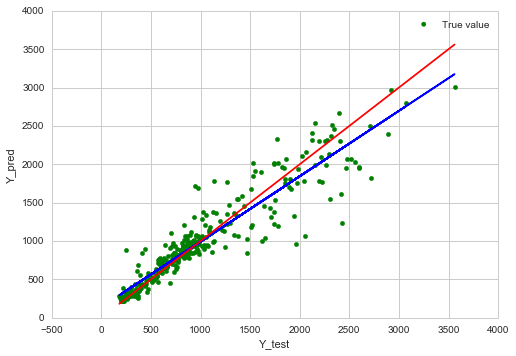

In [5]:
Y_pred = r.predict(r.random_forests(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.870809073236
Mean Squared Error:  56957.5982163
Median Absolute Error:  86.8981162486
Explained Variance Error:  0.871341102496


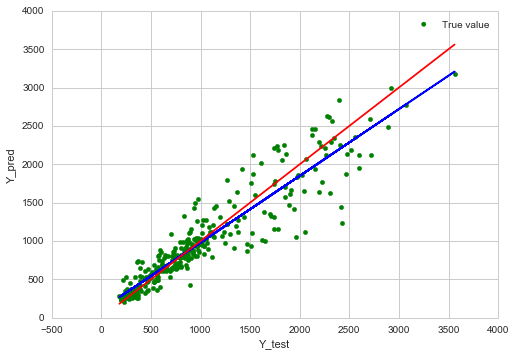

In [6]:
Y_pred = r.predict(r.xgb_trees(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

R2-score:  0.0606494592675
Mean Squared Error:  414140.156924
Median Absolute Error:  280.171700194
Explained Variance Error:  0.164899735727


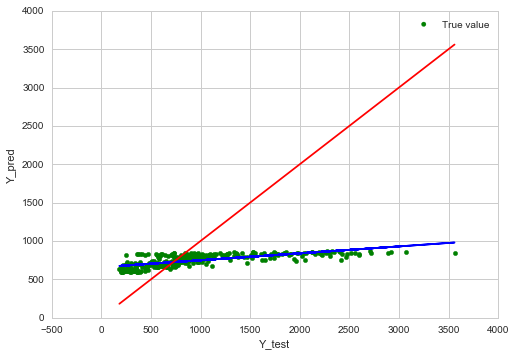

In [7]:
Y_pred = r.predict(r.svm(), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)

Step #1, avg. loss: 1677746.87500
Step #501, epoch #71, avg. loss: 753287.93750
Step #1001, epoch #143, avg. loss: 323708.62500
Step #1501, epoch #214, avg. loss: 233832.15625
Step #2001, epoch #285, avg. loss: 184375.48438
Step #2501, epoch #357, avg. loss: 151988.70312
Step #3001, epoch #428, avg. loss: 128110.12500
Step #3501, epoch #500, avg. loss: 107701.47656
Step #4001, epoch #571, avg. loss: 90625.58594
Step #4501, epoch #643, avg. loss: 75638.67969
R2-score:  0.852081396175
Mean Squared Error:  65214.2423339
Median Absolute Error:  64.4580914945
Explained Variance Error:  0.858154684426


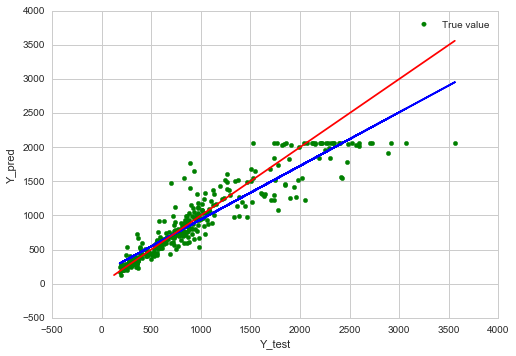

In [8]:
Y_pred = r.predict(r.dnn(nn_steps=5000), X_train, Y_train, X_test, Y_test)
r.plot_true_vs_pred(Y_test, Y_pred)